In [ ]:
import pandas as pd
import matplotlib.patches as patches

In [2]:
def readTable(f):
    df = pd.read_csv(f,sep=' ', header=0, index_col=0)
    df = df.rename(columns=int, index=int)
    df.index.name = 'Day of year'
    df.columns.name = 'Year'
    return df

In [3]:
snowmelt_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SNOWMELT_INDUS.csv')
snowmelt_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SNOWMELT_INDUS.csv')
sublim_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SUBLIM_INDUS.csv')
sublim_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SUBLIM_INDUS.csv')

In [4]:
# Indus basin area in sq km
BasinArea = 865012
# Glacier ablation over 2000-2016 (inc. sublimation) (Miles et al. 2021, Supp. Tab. 4)
TotAbl = 17.7 # Gt/a
ImAbl = 6.2 # Gt/a
TotAblUnc = 3.64 # Gt/a
# Convert to mm
TotAbl_mm = 1e6*TotAbl/BasinArea
TotAblUnc_mm = 1e6*TotAblUnc/BasinArea

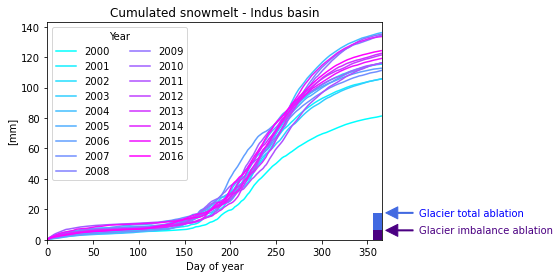

In [5]:
t0,tf = 0,366
ax = snowmelt_mm.plot(colormap='cool')
ax.annotate('Glacier total ablation', xy=(tf, TotAbl),
            verticalalignment='center', xytext=(tf+40, TotAbl),
            arrowprops=dict(color='royalblue', shrink=0.1, width=1),
           **{'color':'blue'})
ax.annotate('Glacier imbalance ablation', xy=(tf, ImAbl),
            verticalalignment='center', xytext=(tf+40, ImAbl),
            arrowprops=dict(color='indigo', shrink=0.1, width=1),
           **{'color':'indigo'})
ax.set(ylabel='[mm]', title='Cumulated snowmelt - Indus basin')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(loc='upper left',ncol=2, title='Year')
ax.add_patch(patches.Rectangle((tf-10, 0), tf, TotAbl, facecolor = 'royalblue'))
ax.add_patch(patches.Rectangle((tf-10, 0), tf, ImAbl, facecolor = 'indigo'));

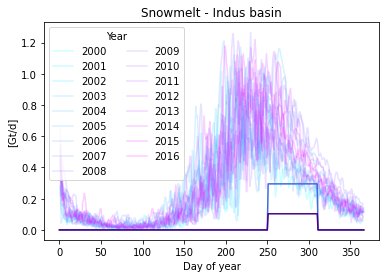

In [6]:
# from 1e-3 m3/d to Gt/d 
ax = snowmelt_m3.applymap(lambda x: x*1e-12).plot(colormap='cool',alpha=0.2)
ax.legend(loc='upper left',ncol=2, title='Year')
ax.set(ylabel='[Gt/d]', title='Snowmelt - Indus basin')
# concentrate glacier melt in 2 months
TotAbl30d = TotAbl/60
ImAbl30d = ImAbl/60
ax.plot([0,250,251,310,311,366],[0,0,TotAbl30d,TotAbl30d,0,0], color= 'royalblue')
ax.plot([0,250,251,310,311,366],[0,0,ImAbl30d,ImAbl30d,0,0], color= 'indigo');

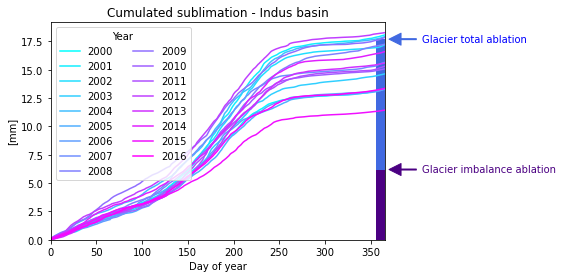

In [7]:
ax = sublim_mm.plot(colormap='cool')
ax.annotate('Glacier total ablation', xy=(tf, TotAbl),
            verticalalignment='center', xytext=(tf+40, TotAbl),
            arrowprops=dict(color='royalblue', shrink=0.1, width=1),
           **{'color':'blue'})
ax.annotate('Glacier imbalance ablation', xy=(tf, ImAbl),
            verticalalignment='center', xytext=(tf+40, ImAbl),
            arrowprops=dict(color='indigo', shrink=0.1, width=1),
           **{'color':'indigo'})
ax.set(ylabel='[mm]', title='Cumulated sublimation - Indus basin')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(loc='upper left',ncol=2, title='Year')
ax.add_patch(patches.Rectangle((tf-10, 0), tf, TotAbl, facecolor = 'royalblue'))
ax.add_patch(patches.Rectangle((tf-10, 0), tf, ImAbl, facecolor = 'indigo'));

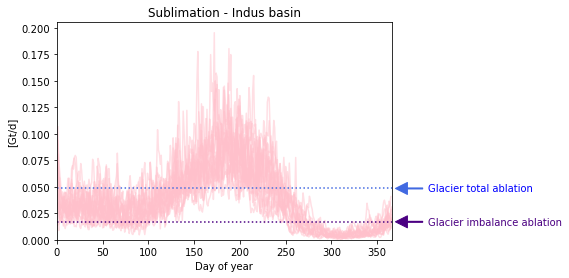

In [8]:
# from 1e-3 m3/d to Gt/d 
ax = sublim_m3.applymap(lambda x: x*1e-12).plot(color='pink', alpha=0.5, legend=None)
# concentrate glacier melt in 2 months
TotAbld = TotAbl/365
ImAbld = ImAbl/365
ax.axhline(TotAbld, color= 'royalblue', ls=':')
ax.axhline(ImAbld, color= 'indigo', ls=':')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.annotate('Glacier total ablation', xy=(tf, TotAbld),
            verticalalignment='center', xytext=(tf+40, TotAbld),
            arrowprops=dict(color='royalblue', shrink=0.1, width=1),
           **{'color':'blue'})
ax.annotate('Glacier imbalance ablation', xy=(tf, ImAbld),
            verticalalignment='center', xytext=(tf+40, ImAbld),
            arrowprops=dict(color='indigo', shrink=0.1, width=1),
           **{'color':'indigo'})
ax.set(ylabel='[Gt/d]', title='Sublimation - Indus basin');

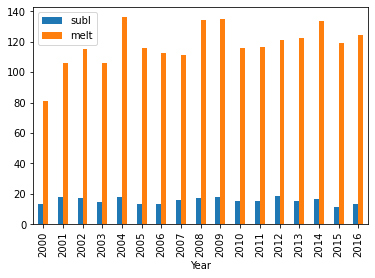

In [9]:
sm = pd.concat([sublim_mm.max(),snowmelt_mm.max()], axis=1, keys=['subl', 'melt'])
ax = sm.plot.bar()

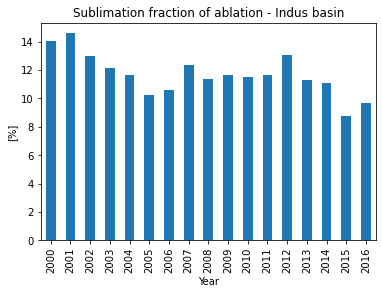

In [10]:
sublimRatio = 100*sublim_mm.max()/(snowmelt_mm.max()+sublim_mm.max())
ax = sublimRatio.plot.bar()
ax.set(ylabel='[%]', title='Sublimation fraction of ablation - Indus basin');